In [1]:
import tensorflow as tf
import keras
from keras import layers
from keras.layers import Activation, Dense, Dropout, Conv1D, Conv2D, Flatten, BatchNormalization, ZeroPadding2D, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Input, Add
from keras.models import Sequential
from keras import regularizers
from keras.optimizers import SGD
import keras.backend as K
from keras.models import load_model
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt


import numpy as np
from numpy import argmax
import pandas as pd
import random

import warnings
warnings.filterwarnings('ignore')

Lets see how can we get these data from the songs. Because of this we will help the python library librosa.

In [2]:
import librosa
import librosa.display
import IPython.display

# we can get data and sampling_rate from the .wav file, then get melspectrogram using this data.
data, sampling_rate = librosa.load(r'D:/Data Science/Machine Learning/project/genres_original/pop/pop.00000.wav')
ps = librosa.feature.melspectrogram(y=data, sr=sampling_rate)
ps.shape

(128, 1293)

In [3]:
print(ps)
IPython.display.Audio(data=data, rate=sampling_rate)

[[8.1725244e+02 7.3817810e+02 7.0648700e+02 ... 2.6786196e+00
  1.0021195e+01 1.4221031e+01]
 [2.3233450e+02 3.1981360e+02 4.1224277e+02 ... 2.1467402e+00
  1.0470587e+01 1.9536898e+01]
 [2.3023177e+02 1.7019153e+02 1.5007874e+02 ... 3.2603302e+00
  6.2829456e+00 4.1416230e+00]
 ...
 [1.0718002e-02 5.2478734e-02 1.4027648e-01 ... 1.7921861e-01
  1.8047237e-01 1.9117287e-01]
 [6.4287237e-03 2.8962230e-02 5.4798856e-02 ... 1.7203037e-01
  1.8676004e-01 1.1655787e-01]
 [1.1968489e-02 3.7595682e-02 4.2041432e-02 ... 6.4729109e-02
  1.1467762e-01 1.6017441e-01]]


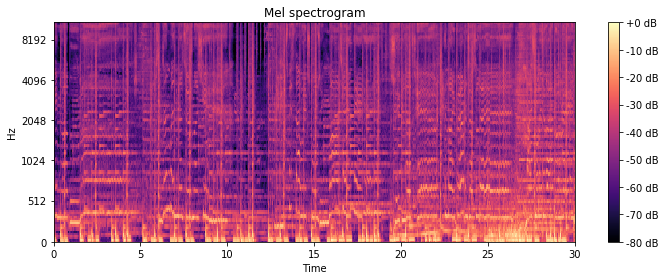

In [4]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [5]:
data1, sampling_rate1 = librosa.load(r'D:/Data Science/Machine Learning/project/genres_original/rock/rock.00000.wav')
ps1 = librosa.feature.melspectrogram(y=data1, sr=sampling_rate1)
ps1.shape

(128, 1293)

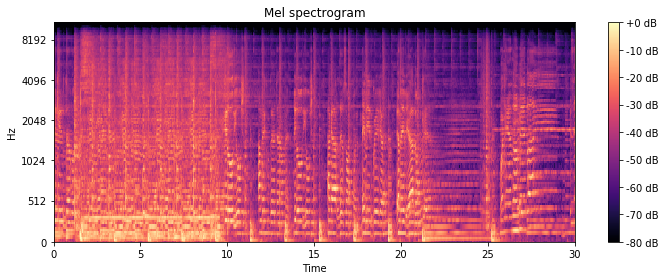

In [6]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(ps1, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

As we see we have 1000 examples of input data, which is few. In that case we can use cross-correlation, which means that, for example, split this data into 5 pieces and use each one for validation. However, I will try a different method at this time and use data augentation. It helps to create synthetic data using operations such as time stretch, pitch shift and etc. Librosa library has these methods as well.  https://medium.com/@makcedward/data-augmentation-for-audio-76912b01fdf6

128


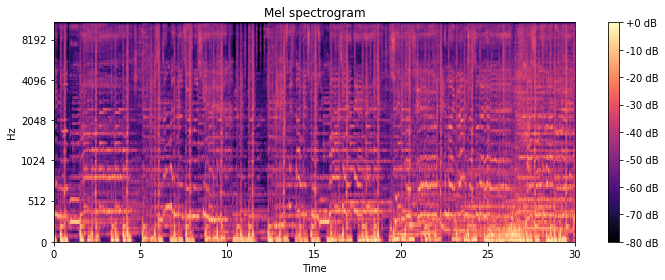

In [7]:
pitch_factor = 0.8
pitch_data = librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)
ps = librosa.feature.melspectrogram(y=pitch_data, sr=sampling_rate)

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

print(len(ps))

128
[[7.7971417e+02 6.6133661e+02 5.7920270e+02 ... 1.1260229e-01
  3.2601199e-01 1.7523400e-01]
 [2.3199622e+02 2.9303888e+02 3.4947565e+02 ... 1.5601018e-01
  1.0083328e+00 1.5216047e+00]
 [2.2205927e+02 1.5248093e+02 1.2559506e+02 ... 4.0644187e-01
  2.6609571e+00 6.6455369e+00]
 ...
 [2.2557892e-02 1.0296161e-01 1.1027028e-01 ... 2.4308795e-01
  9.7790718e-02 6.3280351e-02]
 [9.6313171e-03 4.5159895e-02 6.9137052e-02 ... 2.8264749e-01
  1.4477615e-01 7.1498476e-02]
 [8.2496991e-03 2.3834169e-02 2.7487818e-02 ... 9.9036887e-02
  5.7310458e-02 6.9506884e-02]]


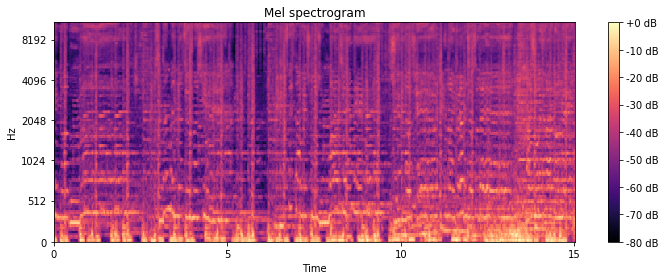

In [8]:
speed_factor = 2
speed_data = librosa.effects.time_stretch(data, speed_factor)
ps = librosa.feature.melspectrogram(y=speed_data, sr=sampling_rate)

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

print(len(ps))
print(ps)

In [9]:
import os
def get_file_list():
    fileList = []
    for dirname, _, filenames in os.walk('D:/Data Science/Machine Learning/project/genres_original/'):
        for filename in filenames:
            genre = filename.split(".")[0]
            res = (os.path.join(dirname, filename), genre)
            fileList.append(res)
    return fileList

In [10]:
print(len(get_file_list()))

1000


In [11]:
def get_speed_data(data, sampling_rate, speed_factor):
    speed_data = librosa.effects.time_stretch(data, speed_factor)
    ps = librosa.feature.melspectrogram(y=speed_data, sr=sampling_rate)
    return ps
def get_pitch_data(data, sampling_rate, pitch_factor):
    pitch_data = librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)
    ps = librosa.feature.melspectrogram(y=pitch_data, sr=sampling_rate)
    return ps

In [12]:
speed_factor1 = 0.8
speed_factor2 = 0.9
pitch_factor1 = 2
pitch_factor2 = -2
def get_augmented_data(fileList):
    D = []
    for i in fileList:
        data, sampling_rate = librosa.load(i[0], duration = 10)
        label = i[1]
        ps = librosa.feature.melspectrogram(y=data, sr=sampling_rate)
        ps_speed_1 = get_speed_data(data, sampling_rate, speed_factor1)
        ps_speed_2 = get_speed_data(data, sampling_rate, speed_factor2)
        ps_pitch_1 = get_pitch_data(data, sampling_rate, pitch_factor1)
        ps_pitch_2 = get_pitch_data(data, sampling_rate, pitch_factor2)
        if ps.shape == (128, 431):
            D.append((ps, label))
        if ps_speed_1.shape == (128, 431):
            D.append((ps_speed_1, label))
        if ps_speed_2.shape == (128, 431):
            D.append((ps_speed_2, label))
        if ps_pitch_1.shape == (128, 431):
            D.append((ps_pitch_1, label))
        if ps_pitch_2.shape == (128, 431):
            D.append((ps_pitch_2, label))
    return D

In [13]:
def get_data():
    fileList = get_file_list()
    data = get_augmented_data(fileList)
    print(len(data))
    return data

In [14]:
data = get_data()

3000


In [36]:
print(data[0])

(array([[3.5203927e+00, 1.8459339e+00, 7.4453580e-01, ..., 6.4352102e+00,
        1.5998900e+00, 5.1741952e-01],
       [2.6376698e+00, 3.3334365e+00, 5.0216441e+00, ..., 2.7774487e+01,
        5.2980103e+00, 4.3676434e+00],
       [3.7899545e-01, 4.1639844e-01, 2.9910865e+00, ..., 7.4579048e+00,
        5.1384997e+00, 2.2606213e+01],
       ...,
       [7.7013701e-06, 2.0388457e-06, 2.6747733e-07, ..., 2.0924459e-07,
        2.8722863e-07, 7.8452564e-07],
       [6.9603261e-06, 1.7515349e-06, 1.5669674e-08, ..., 3.9152170e-08,
        3.6188183e-08, 5.0053865e-07],
       [6.7196529e-06, 1.6836586e-06, 4.3950092e-09, ..., 8.9765209e-09,
        9.9546034e-09, 4.7464613e-07]], dtype=float32), 'blues')


In [17]:
a1 = 0
a2 = 0
a3 = 0
a4 = 0
a5 = 0
a6 = 0
a7 = 0
a8 = 0
a9 = 0
a9 = 0
a10 = 0
for i, g in data:
    if g == 'blues':
        a1 = a1 + 1
    elif g == 'classical':
        a2 = a2 + 1
    elif g == 'country':
        a3 = a3 + 1
    elif g == 'disco':
        a4 = a4 + 1
    elif g == 'hiphop':
        a5 = a5 + 1
    elif g == 'jazz':
        a6 = a6 + 1
    elif g == 'metal':
        a7 = a7 + 1
    elif g == 'pop':
        a8 = a8 + 1
    elif g == 'reggae':
        a9 = a9 + 1
    elif g == 'rock':
        a10 = a10 + 1
print(a1)
print(a2)
print(a3)
print(a4)
print(a5)
print(a6)
print(a7)
print(a8)
print(a9)
print(a10)

300
300
300
300
300
300
300
300
300
300


In [18]:
import random
random.shuffle(data)
print(data[2][0].shape)

(128, 431)


In [19]:

#train test validation split 60%:20%:20%
train = data[:2400]
dev = data[2400:2700]
test = data[2700:3000]

X_train, Y_train_str = zip(*train)
X_dev, Y_dev_str = zip(*dev)
X_test, Y_test_str = zip(*test)

X_test_origin = X_test


In [20]:
print(Y_train_str)

('classical', 'disco', 'metal', 'blues', 'rock', 'pop', 'reggae', 'pop', 'jazz', 'pop', 'rock', 'classical', 'disco', 'hiphop', 'reggae', 'rock', 'country', 'metal', 'reggae', 'hiphop', 'jazz', 'pop', 'metal', 'pop', 'pop', 'classical', 'rock', 'rock', 'pop', 'metal', 'country', 'jazz', 'metal', 'rock', 'hiphop', 'metal', 'rock', 'hiphop', 'blues', 'hiphop', 'rock', 'hiphop', 'rock', 'country', 'disco', 'reggae', 'jazz', 'country', 'country', 'rock', 'jazz', 'metal', 'rock', 'reggae', 'reggae', 'country', 'metal', 'pop', 'hiphop', 'classical', 'country', 'jazz', 'metal', 'jazz', 'blues', 'classical', 'pop', 'disco', 'country', 'pop', 'classical', 'jazz', 'classical', 'country', 'rock', 'pop', 'rock', 'metal', 'hiphop', 'rock', 'disco', 'disco', 'hiphop', 'pop', 'classical', 'rock', 'metal', 'pop', 'metal', 'rock', 'reggae', 'hiphop', 'hiphop', 'disco', 'country', 'jazz', 'country', 'hiphop', 'disco', 'country', 'disco', 'blues', 'disco', 'metal', 'jazz', 'classical', 'blues', 'disco', 

In [21]:
def get_number_with_genre(g):
    if g == 'blues':
        return 0
    elif g == 'classical':
        return 1
    elif g == 'country':
        return 2
    elif g == 'disco':
        return 3
    elif g == 'hiphop':
        return 4
    elif g == 'jazz':
        return 5
    elif g == 'metal':
        return 6
    elif g == 'pop':
        return 7
    elif g == 'reggae':
        return 8
    elif g == 'rock':
        return 9
    
def get_genre_with_number(n):
    if n == 0:
        return 'blues'
    elif n == 1:
        return 'classical'
    elif n == 2:
        return 'country'
    elif n == 3:
        return 'disco'
    elif n == 4:
        return 'hiphop'
    elif n == 5:
        return 'jazz'
    elif n == 6:
        return 'metal'
    elif n == 7:
        return 'pop'
    elif n == 8:
        return 'reggae'
    elif n == 9:
        return 'rock'

In [22]:
Y_train = []
for i in Y_train_str:
    Y_train.append(get_number_with_genre(i))
print(Y_train)

Y_dev = []
for i in Y_dev_str:
    Y_dev.append(get_number_with_genre(i))

Y_test = []
for i in Y_test_str:
    Y_test.append(get_number_with_genre(i))

[1, 3, 6, 0, 9, 7, 8, 7, 5, 7, 9, 1, 3, 4, 8, 9, 2, 6, 8, 4, 5, 7, 6, 7, 7, 1, 9, 9, 7, 6, 2, 5, 6, 9, 4, 6, 9, 4, 0, 4, 9, 4, 9, 2, 3, 8, 5, 2, 2, 9, 5, 6, 9, 8, 8, 2, 6, 7, 4, 1, 2, 5, 6, 5, 0, 1, 7, 3, 2, 7, 1, 5, 1, 2, 9, 7, 9, 6, 4, 9, 3, 3, 4, 7, 1, 9, 6, 7, 6, 9, 8, 4, 4, 3, 2, 5, 2, 4, 3, 2, 3, 0, 3, 6, 5, 1, 0, 3, 2, 0, 9, 9, 8, 4, 8, 9, 0, 8, 7, 3, 3, 7, 3, 7, 1, 3, 0, 5, 9, 8, 8, 3, 1, 6, 8, 4, 0, 0, 6, 0, 6, 1, 9, 9, 5, 1, 1, 7, 2, 7, 3, 7, 1, 6, 5, 1, 6, 1, 0, 5, 2, 9, 6, 4, 9, 6, 1, 0, 8, 8, 8, 9, 0, 7, 2, 3, 8, 3, 5, 5, 0, 8, 4, 8, 2, 4, 1, 6, 7, 3, 6, 8, 0, 2, 6, 2, 5, 3, 0, 7, 6, 9, 3, 2, 8, 9, 2, 9, 5, 2, 2, 7, 8, 7, 4, 7, 9, 1, 8, 4, 5, 7, 1, 7, 3, 0, 8, 8, 0, 8, 9, 6, 1, 3, 3, 8, 9, 3, 0, 7, 9, 7, 0, 5, 3, 0, 5, 8, 3, 0, 5, 0, 1, 1, 8, 6, 1, 3, 1, 4, 8, 9, 2, 0, 0, 7, 2, 1, 7, 5, 7, 8, 1, 6, 9, 6, 2, 2, 1, 1, 1, 8, 4, 1, 7, 9, 6, 1, 8, 8, 9, 2, 4, 9, 4, 5, 7, 7, 0, 3, 9, 1, 1, 6, 2, 7, 5, 8, 9, 6, 9, 1, 1, 1, 0, 8, 1, 5, 7, 0, 9, 8, 8, 6, 2, 7, 5, 8, 5, 8, 4, 4, 6, 

In [23]:
from keras.utils import to_categorical 
# One-Hot encoding for classes
Y_train = np.array(to_categorical(Y_train, 10))
Y_dev = np.array(to_categorical(Y_dev, 10))
Y_test = np.array(to_categorical(Y_test, 10))
print(Y_train)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [24]:
# Reshape for CNN input
X_train = np.array([x.reshape( (128, 431, 1) ) for x in X_train])
X_dev = np.array([x.reshape( (128, 431, 1) ) for x in X_dev])
X_test = np.array([x.reshape( (128, 431, 1) ) for x in X_test])

print(X_dev.shape)

(300, 128, 431, 1)


In [25]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import Adam
nb_epoch = 2

batch_size = 64
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 5
nb_classes = 10

shape_ord = X_train[0].shape
print(shape_ord)

(128, 431, 1)


In [27]:
model = Sequential()

model.add(Conv2D(nb_filters, (nb_conv, nb_conv), strides=(1, 1), input_shape=shape_ord))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Activation('relu'))

model.add(Conv2D(nb_filters, (nb_conv, nb_conv), padding="same"))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Activation('relu'))

model.add(Conv2D(nb_filters, (nb_conv, nb_conv), padding="same"))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 427, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 213, 32)       0         
_________________________________________________________________
activation (Activation)      (None, 62, 213, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 213, 32)       25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 106, 32)       0         
_________________________________________________________________
activation_1 (Activation)    (None, 31, 106, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 106, 32)       2

In [43]:
epochs = 10
batch_size = 8
learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.9
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=['accuracy'])

In [44]:
batch_size = 64
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [67]:
hist = model.fit(x=X_train, y=Y_train, epochs=epochs, batch_size=batch_size, validation_data= (X_dev, Y_dev)) 

Epoch 1/10
38/38 [==============================] - 157s 4s/step - loss: 0.7631 - accuracy: 0.7175 - val_loss: 0.7521 - val_accuracy: 0.7700
Epoch 2/10
38/38 [==============================] - 151s 4s/step - loss: 0.7153 - accuracy: 0.7508 - val_loss: 0.7561 - val_accuracy: 0.7733
Epoch 3/10
38/38 [==============================] - 155s 4s/step - loss: 0.6498 - accuracy: 0.7650 - val_loss: 0.6922 - val_accuracy: 0.7733
Epoch 4/10
38/38 [==============================] - 164s 4s/step - loss: 0.6304 - accuracy: 0.7821 - val_loss: 0.6862 - val_accuracy: 0.8000
Epoch 5/10
38/38 [==============================] - 150s 4s/step - loss: 0.6183 - accuracy: 0.7750 - val_loss: 0.6696 - val_accuracy: 0.8067
Epoch 6/10
38/38 [==============================] - 142s 4s/step - loss: 0.6034 - accuracy: 0.7867 - val_loss: 0.6992 - val_accuracy: 0.8033
Epoch 7/10
38/38 [==============================] - 140s 4s/step - loss: 0.5831 - accuracy: 0.7950 - val_loss: 0.6414 - val_accuracy: 0.8033
Epoch 8/10
38

In [68]:
score = model.evaluate(x=X_test, y=Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10/10 [==============================] - 3s 262ms/step - loss: 0.6194 - accuracy: 0.7967
Test loss: 0.6193985939025879
Test accuracy: 0.79666668176651


In [72]:
from termcolor import colored
yhat = model.predict_classes(X_test)
correct = 0
for i in range(len(yhat)):
    if argmax(Y_test[i]) == yhat[i]:
        correct = correct + 1
        #print('True value: ' + str(argmax(Y_test[i])) + ', Predict: ' + str(yhat[i]))
        print('True value: ' + get_genre_with_number(argmax(Y_test[i])) + ', Predict: ' + get_genre_with_number(yhat[i]))
    else:
        print(colored('True value: ' + get_genre_with_number(argmax(Y_test[i])) + ', Predict: ' + get_genre_with_number(yhat[i]), 'red'))
print("Number of correct results is: " + str(correct) + " from 300 test examples.")
print("Accuracy is: " + str(correct/len(yhat)))

True value: reggae, Predict: reggae
True value: reggae, Predict: blues
True value: rock, Predict: rock
True value: reggae, Predict: reggae
True value: pop, Predict: pop
True value: pop, Predict: pop
True value: pop, Predict: pop
True value: country, Predict: country
True value: disco, Predict: disco
True value: metal, Predict: metal
True value: reggae, Predict: rock
True value: country, Predict: country
True value: hiphop, Predict: hiphop
True value: country, Predict: jazz
True value: rock, Predict: rock
True value: pop, Predict: hiphop
True value: rock, Predict: metal
True value: metal, Predict: metal
True value: disco, Predict: reggae
True value: country, Predict: country
True value: reggae, Predict: blues
True value: pop, Predict: hiphop
True value: jazz, Predict: jazz
True value: rock, Predict: rock
True value: country, Predict: country
True value: blues, Predict: pop
True value: rock, Predict: rock
True value: hiphop, Predict: hiphop
True value: rock, Predict: rock
True value: cou

In the dataset, there was very interesting csv file, with all the information about files. However, I didn't used it in my project.

In [49]:
data = pd.read_csv(r'D:/Data Science/Machine Learning/project/features_30_sec.csv')
data.head(10)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,1.297741e+05,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,3.758501e+05,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,1.564676e+05,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,1.843559e+05,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,3.433999e+05,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
5,blues.00005.wav,661794,0.302456,0.087532,0.103494,0.003981,1831.993940,1.030482e+06,1729.653287,201910.508633,...,72.549225,-1.838263,68.702026,-2.783800,42.447453,-3.047909,39.808784,-8.109991,46.311005,blues
6,blues.00006.wav,661794,0.291328,0.093981,0.141874,0.008803,1459.366472,4.378594e+05,1389.009131,185023.239545,...,83.248245,-10.913176,56.902153,-6.971336,38.231800,-3.436505,48.235741,-6.483466,70.170364,blues
7,blues.00007.wav,661794,0.307955,0.092903,0.131822,0.005531,1451.667066,4.495682e+05,1577.270941,168211.938804,...,70.438438,-10.568935,52.090893,-10.784515,60.461330,-4.690678,65.547516,-8.630722,56.401436,blues
8,blues.00008.wav,661794,0.408879,0.086512,0.142416,0.001507,1719.368948,1.632828e+05,2031.740381,105542.718193,...,50.563751,-7.041824,28.894934,2.695248,36.889568,3.412305,33.698597,-2.715692,36.418430,blues
9,blues.00009.wav,661794,0.273950,0.092316,0.081314,0.004347,1817.150863,2.982361e+05,1973.773306,114070.112591,...,59.314602,-1.916804,58.418438,-2.292661,83.205231,2.881967,77.082222,-4.235203,91.468811,blues


In [66]:
data.tail()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock
999,rock.00099.wav,661794,0.358401,0.085884,0.054454,0.000336,1609.795082,422203.216152,1797.213044,120115.632927,...,59.167755,-7.069775,73.760391,0.028346,76.504326,-2.025783,72.189316,1.155239,49.662510,rock


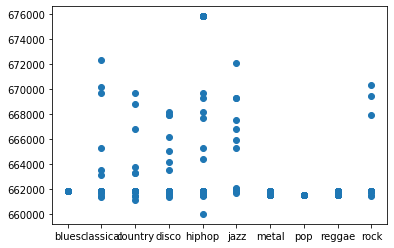

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
#print(data['filename'])
plt.scatter(data['label'], data['length']);

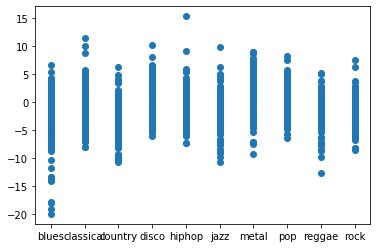

In [63]:
plt.scatter(data['label'], data['mfcc20_mean']);

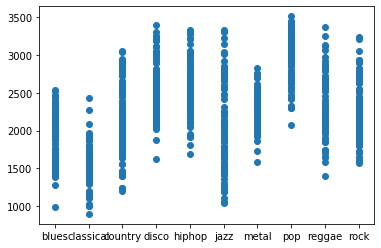

In [64]:

plt.scatter(data['label'], data['spectral_bandwidth_mean']);

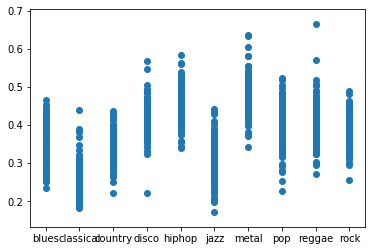

In [65]:
plt.scatter(data['label'], data['chroma_stft_mean']);